In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
import datetime as dt
import seaborn as sns
import matplotlib.dates as mdates
from statsmodels.nonparametric.smoothers_lowess import lowess
import time
import random

%matplotlib inline

In [132]:
df = pd.read_csv('../Datafiles/NursingData_6-3_clean.csv', index_col=[1])

In [138]:
df.head()

,Year,Month,TimeofDay,LeftFeed,RightFeed,BotFeed,TotalFeed,BotAmt,Sleep
time,,,,,,,,,
2015-06-21 01:17:09,2015,6,Late night,0.00,1.3,0,1.30,NaN,NaN
2015-06-21 02:00:39,2015,6,Late night,7.52,0.0,0,7.52,NaN,NaN
2015-06-21 02:37:57,2015,6,Late night,14.50,0.0,0,14.50,NaN,NaN
2015-06-21 05:23:55,2015,6,Late night,0.00,20.0,0,20.00,NaN,NaN
2015-06-21 05:47:59,2015,6,Late night,22.18,0.0,0,22.18,NaN,NaN


In [137]:
del df['Unnamed: 0']

In [145]:
may = df.loc[df.index >= '2016-05']
may[may['Sleep'] > 4]

,Year,Month,TimeofDay,LeftFeed,RightFeed,BotFeed,TotalFeed,BotAmt,Sleep
time,,,,,,,,,
2016-05-01 00:00:00,2016,5,Late night,NaN,NaN,0,NaN,NaN,11.27
2016-05-02 00:23:07,2016,5,Late night,NaN,NaN,0,NaN,NaN,12.33
2016-05-02 23:01:48,2016,5,Evening,NaN,NaN,0,NaN,NaN,8.47
2016-05-03 22:52:34,2016,5,Evening,NaN,NaN,0,NaN,NaN,12.40
2016-05-05 18:35:17,2016,5,Afternoon,NaN,NaN,0,NaN,NaN,6.35
2016-05-06 23:51:24,2016,5,Evening,NaN,NaN,0,NaN,NaN,11.38
2016-05-08 00:00:00,2016,5,Late night,NaN,NaN,0,NaN,NaN,11.90
2016-05-09 00:10:00,2016,5,Late night,NaN,NaN,0,NaN,NaN,12.05
2016-05-09 23:42:41,2016,5,Evening,NaN,NaN,0,NaN,NaN,11.08


# Plotting eat/sleep periods for one day

In [15]:
#creating dummy df
date = '2/06/2016'
#for date string listed, parse into dt format 
parsed = dt.datetime.strptime(date,'%m/%d/%Y')
#create date range for index
dateind = pd.date_range(date, periods=1440, freq='min')

ts = pd.DataFrame(np.zeros((len(dateind),2)),columns=['Eat','Sleep'],index=dateind)

In [28]:
#cleaner new way to do it
for i,dtinfo in enumerate(df.time):
    if dtinfo.date() == parsed.date():
        eatsleep = ''
        if df.TotalFeed[i] > 0:
            eatsleep = 'e'
            intmin = int(df.TotalFeed[i])#don't care about seconds
            endtime = dtinfo + dt.timedelta(minutes = intmin)
        if df.Sleep[i] > 0:
            eatsleep = 's'
            inthrs = int(df.Sleep[i])
            intmin = int((df.Sleep[i]-inthrs)*60)
            endtime = dtinfo + dt.timedelta(hours = inthrs, minutes = intmin)
            print(dtinfo,endtime)

        for j,timebymin in enumerate(ts.index):
#            print(dtinfo,timebymin,endtime)
            if dtinfo < timebymin and timebymin <= endtime:
                if eatsleep == 'e':
                    ts.Eat[j] = 1
                if eatsleep == 's':
                    ts.Sleep[j] = 1
            if timebymin > endtime:
                break

2016-02-06 15:08:00 2016-02-06 16:08:00
2016-02-06 18:08:00 2016-02-06 18:39:00
2016-02-06 23:20:26 2016-02-07 11:51:26


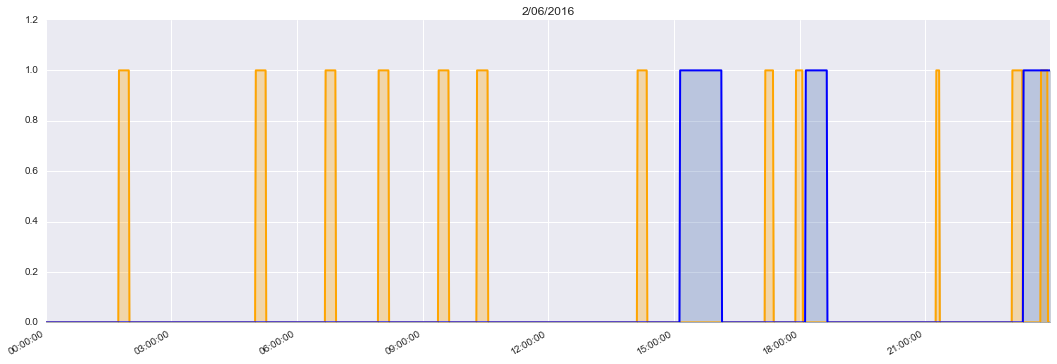

In [22]:
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(111)
ax.plot(ts.index,ts.Eat,'orange',linewidth=2)
ax.fill_between(ts.index, 0, ts.Eat,alpha=0.3,facecolor='orange')
ax.plot(ts.index,ts.Sleep,'b',linewidth=2)
ax.fill_between(ts.index,0, ts.Sleep,alpha=0.3)
ax.set_ylim(0,1.2)
ax.set_title(date)
fig.autofmt_xdate()
fig.savefig('Day20160122.png')

In [9]:
#eventually...
ts.resample('5min',how='sum',closed='left',label='left')

,Eat,Sleep
2016-01-22 00:00:00,0,0
2016-01-22 00:05:00,0,0
2016-01-22 00:10:00,0,0
2016-01-22 00:15:00,0,0
2016-01-22 00:20:00,0,0
2016-01-22 00:25:00,0,4
2016-01-22 00:30:00,0,5
2016-01-22 00:35:00,0,5
2016-01-22 00:40:00,0,5
2016-01-22 00:45:00,0,5


# --------For all days

## Cleaning the data

In [29]:
#create array for index
timeind = pd.date_range("00:00", "23:59", freq='min').time
#create date, eat/sleep arrays for multiIndex
totarr = pd.Series(d.date() for d in df.time)
datearr = totarr.unique()
dateind = []
for d in datearr:
    dateind.append(d)
    dateind.append(d)
esarr = ['Eat','Sleep']*len(datearr)
arrays = [dateind,esarr]

ts = pd.DataFrame(np.zeros((len(timeind),len(dateind))),index=timeind,columns=arrays)
ts.head()

2015-06-21       2015-06-22       2015-06-23       2015-06-24        \
                Eat Sleep        Eat Sleep        Eat Sleep        Eat Sleep   
00:00:00          0     0          0     0          0     0          0     0   
00:01:00          0     0          0     0          0     0          0     0   
00:02:00          0     0          0     0          0     0          0     0   
00:03:00          0     0          0     0          0     0          0     0   
00:04:00          0     0          0     0          0     0          0     0   

         2015-06-25        ...  2016-05-30       2016-05-31       2016-06-01  \
                Eat Sleep  ...         Eat Sleep        Eat Sleep        Eat   
00:00:00          0     0  ...           0     0          0     0          0   
00:01:00          0     0  ...           0     0          0     0          0   
00:02:00          0     0  ...           0     0          0     0          0   
00:03:00          0     0  ...           0     0          0     0          0   
00:04:00          0     0  ...           0     0          0     0          0   

               2016-06-02       2015-05-31        
         Sleep        Eat Sleep        Eat Sleep  
00:00:00     0          0     0          0     0  
00:01:00     0          0     0          0     0  
00:02:00     0          0     0          0     0  
00:03:00     0          0     0          0     0  
00:04:00     0          0     0          0     0  

[5 rows x 698 columns]

In [60]:
#for each entry in original data, either an eat or a sleep
for i,dtinfo in enumerate(df.time):
    print(dtinfo)
    eatsleep = ''
    if df.TotalFeed[i] > 0:
        eatsleep = 'e'
        intmin = int(df.TotalFeed[i])#don't care about seconds
        endtime = dtinfo + dt.timedelta(minutes = intmin)
    if df.Sleep[i] > 0:
        eatsleep = 's'
        inthrs = int(df.Sleep[i])
        intmin = int((df.Sleep[i]-inthrs)*60)
        endtime = dtinfo + dt.timedelta(hours = inthrs, minutes = intmin)
    
    for dates in datearr[230:235]:
#        for dates in datearr:
            #find matching date
        if dtinfo.date() == dates:            
            #go through times on that date, set appropriate toggles
            for timebymin in ts.index:
                if dtinfo.to_datetime() < dt.datetime.combine(dtinfo.date(),timebymin) <= endtime.to_datetime():
                    if eatsleep == 'e':
                        ts.loc[timebymin,(dates,'Eat')]=1
                    if eatsleep == 's':
                        ts.loc[timebymin,(dates,'Sleep')]=1
                if dt.datetime.combine(dtinfo.date(),timebymin) > endtime.to_datetime():
                    break
#previous for loop goes through 0-24 hours, but what about events that pass through midnight?
#2016-02-06 23:20:26, 2016-02-07 11:51:26
#previous loop will get the part from 23:20:26 - 24:00
#need to get the part from 00:00-11:51 on the next day
        if endtime.date() > dates:
            for timebymin in ts.index:
                if dtinfo.to_datetime() < dt.datetime.combine(dtinfo.date(),timebymin) <= endtime.to_datetime():
                    if eatsleep == 'e':
                        ts.loc[timebymin,(endtime.date(),'Eat')]=1
                    if eatsleep == 's':
                        ts.loc[timebymin,(endtime.date(),'Sleep')]=1
                if dt.datetime.combine(dtinfo.date(),timebymin) > endtime.to_datetime():
                    break

2015-06-21 01:17:09
2015-06-21 02:00:39
2015-06-21 02:37:57
2015-06-21 05:23:55
2015-06-21 05:47:59
2015-06-21 06:24:35
2015-06-21 07:50:08
2015-06-21 08:44:12
2015-06-21 09:48:26
2015-06-21 10:46:21
2015-06-21 11:13:51
2015-06-21 11:58:37
2015-06-21 15:05:44
2015-06-21 16:30:33
2015-06-21 18:12:37
2015-06-21 21:31:23
2015-06-21 23:14:22
2015-06-21 23:59:14
2015-06-22 01:30:31
2015-06-22 01:53:45
2015-06-22 02:55:56
2015-06-22 03:18:23
2015-06-22 04:02:48
2015-06-22 06:38:09
2015-06-22 07:33:03
2015-06-22 09:12:34
2015-06-22 09:32:06
2015-06-22 10:11:36
2015-06-22 11:07:19
2015-06-22 12:22:05
2015-06-22 13:38:40
2015-06-22 15:00:42
2015-06-22 16:27:02
2015-06-22 17:42:17
2015-06-22 18:53:32
2015-06-22 21:14:43
2015-06-22 22:27:36
2015-06-22 23:41:42
2015-06-23 00:21:07
2015-06-23 01:53:00
2015-06-23 05:00:55
2015-06-23 06:09:07
2015-06-23 07:52:03
2015-06-23 08:13:37
2015-06-23 08:44:04
2015-06-23 09:50:53
2015-06-23 13:00:00
2015-06-23 14:57:40
2015-06-23 16:00:43
2015-06-23 17:15:00


In [169]:
ts.head()

2015-06-21       2015-06-22       2015-06-23       2015-06-24        \
                Eat Sleep        Eat Sleep        Eat Sleep        Eat Sleep   
00:00:00          0     0          1     0          0     0          0     0   
00:01:00          0     0          1     0          0     0          0     0   
00:02:00          0     0          1     0          0     0          0     0   
00:03:00          0     0          1     0          0     0          0     0   
00:04:00          0     0          1     0          0     0          0     0   

         2015-06-25        ...  2016-05-27       2016-05-28       2016-05-29  \
                Eat Sleep  ...         Eat Sleep        Eat Sleep        Eat   
00:00:00          1     0  ...           0     1          1     0          0   
00:01:00          1     0  ...           0     1          1     0          0   
00:02:00          0     0  ...           0     1          1     0          0   
00:03:00          0     0  ...           0     1          1     0          0   
00:04:00          0     0  ...           0     1          1     0          0   

               2016-05-30       2016-05-31        
         Sleep        Eat Sleep        Eat Sleep  
00:00:00     0          1     0          0     1  
00:01:00     0          1     0          0     1  
00:02:00     0          1     0          0     1  
00:03:00     0          1     0          0     1  
00:04:00     0          1     0          0     1  

[5 rows x 692 columns]

In [162]:
midnight = pd.to_datetime('00:00:00').time()
oneAM = pd.to_datetime('01:00:00').time()
may21 = pd.to_datetime('2016-5-21').date()
may31 = pd.to_datetime('2016-5-31').date()
ts.loc[slice(midnight,oneAM),slice(may21,may31)]

2016-05-21       2016-05-22       2016-05-23       2016-05-24        \
                Eat Sleep        Eat Sleep        Eat Sleep        Eat Sleep   
00:00:00          0     1          0     1          0     1          0     1   
00:01:00          0     1          0     1          0     1          0     1   
00:02:00          0     1          0     1          0     1          0     1   
00:03:00          0     1          0     1          0     1          0     1   
00:04:00          0     1          0     1          0     1          1     1   
00:05:00          0     1          0     1          0     1          1     1   
00:06:00          0     1          0     1          0     1          1     1   
00:07:00          0     1          0     1          0     1          1     1   
00:08:00          0     1          0     1          0     1          1     1   
00:09:00          0     1          0     1          0     1          1     1   
00:10:00          0     1          0     1          0     1          1     1   
00:11:00          0     1          0     1          0     1          1     1   
00:12:00          0     1          0     1          0     1          1     1   
00:13:00          0     1          0     1          0     1          1     1   
00:14:00          0     1          0     1          0     1          0     1   
00:15:00          0     1          0     1          0     1          0     1   
00:16:00          0     1          0     1          0     1          0     1   
00:17:00          0     1          0     1          0     1          0     1   
00:18:00          0     1          0     1          0     1          0     1   
00:19:00          0     1          0     1          0     1          0     1   
00:20:00          0     1          0     1          0     1          0     1   
00:21:00          0     1          0     1          0     1          0     1   
00:22:00          0     1          0     1          1     1          0     1   
00:23:00          0     1          0     1          1     1          0     1   
00:24:00          0     1          0     1          1     1          0     1   
00:25:00          0     1          0     1          1     1          0     1   
00:26:00          0     1          0     1          1     1          0     1   
00:27:00          0     1          0     1          1     1          0     1   
00:28:00          0     1          0     1          1     1          0     1   
00:29:00          0     1          0     1          1     1          0     1   
...             ...   ...        ...   ...        ...   ...        ...   ...   
00:31:00          0     1          0     1          1     1          0     1   
00:32:00          0     1          0     1          1     1          0     1   
00:33:00          0     1          0     1          1     1          0     1   
00:34:00          0     1          0     1          1     1          0     1   
00:35:00          0     1          0     1          1     1          0     1   
00:36:00          0     1          0     1          1     1          0     1   
00:37:00          0     1          0     1          0     1          0     1   
00:38:00          0     1          0     1          0     1          0     1   
00:39:00          0     1          0     1          0     1          0     1   
00:40:00          0     1          0     1          0     1          0     1   
00:41:00          0     1          0     1          0     1          0     1   
00:42:00          0     1          0     1          0     1          0     1   
00:43:00          0     1          0     1          0     1          0     1   
00:44:00          0     1          0     1          0     1          0     1   
00:45:00          0     1          0     1          0     1          0     1   
00:46:00          1     1          0     1          0     1          0     1   
00:47:00          1     1          0     1          0     1          0     1   
00:48:00 

In [79]:
dates = dt.datetime.strptime('2016-02-05','%Y-%m-%d')
endtime = dt.datetime.strptime('2016-02-06 01:59:07','%Y-%m-%d %H:%M:%S')
dtinfo = dt.datetime.strptime('2016-02-05 22:35:01','%Y-%m-%d %H:%M:%S')
eatsleep = 's'

if endtime > dates:
    for timebymin in ts.index:
        print(timebymin)
        if dtinfo < dt.datetime.combine(endtime.date(),timebymin) <= endtime:
            print(dtinfo < dt.datetime.combine(endtime.date(),timebymin) <= endtime)
            if eatsleep == 'e':
                print('eat')
                ts.loc[timebymin,(endtime.date(),'Eat')]=1
            if eatsleep == 's':
                print('sleep')
                ts.loc[timebymin,(endtime.date(),'Sleep')]=1
        if dt.datetime.combine(dtinfo.date(),timebymin) > endtime:
            break

00:00:00
True
sleep
00:01:00
True
sleep
00:02:00
True
sleep
00:03:00
True
sleep
00:04:00
True
sleep
00:05:00
True
sleep
00:06:00
True
sleep
00:07:00
True
sleep
00:08:00
True
sleep
00:09:00
True
sleep
00:10:00
True
sleep
00:11:00
True
sleep
00:12:00
True
sleep
00:13:00
True
sleep
00:14:00
True
sleep
00:15:00
True
sleep
00:16:00
True
sleep
00:17:00
True
sleep
00:18:00
True
sleep
00:19:00
True
sleep
00:20:00
True
sleep
00:21:00
True
sleep
00:22:00
True
sleep
00:23:00
True
sleep
00:24:00
True
sleep
00:25:00
True
sleep
00:26:00
True
sleep
00:27:00
True
sleep
00:28:00
True
sleep
00:29:00
True
sleep
00:30:00
True
sleep
00:31:00
True
sleep
00:32:00
True
sleep
00:33:00
True
sleep
00:34:00
True
sleep
00:35:00
True
sleep
00:36:00
True
sleep
00:37:00
True
sleep
00:38:00
True
sleep
00:39:00
True
sleep
00:40:00
True
sleep
00:41:00
True
sleep
00:42:00
True
sleep
00:43:00
True
sleep
00:44:00
True
sleep
00:45:00
True
sleep
00:46:00
True
sleep
00:47:00
True
sleep
00:48:00
True
sleep
00:49:00
True
sleep


In [74]:
print(dtinfo,',',dt.datetime.combine(dtinfo.date(),timebymin),',',endtime,eatsleep)

2016-02-05 22:35:01 , 2016-02-05 23:59:00 , 2016-02-06 01:59:07 


In [53]:
dtinfo.to_datetime()

datetime.datetime(2016, 2, 6, 1, 44, 7)

In [48]:
dt.datetime.combine(dtinfo.date(),timebymin)

datetime.datetime(2016, 2, 6, 0, 0)

In [54]:
endtime.to_datetime()

datetime.datetime(2016, 2, 6, 1, 59, 7)

In [57]:
endtime.to_datetime() > dt.datetime.combine(dtinfo.date(),timebymin)

True

In [176]:
ts.to_csv('../Datafiles/NursingData_5-31_clean_ts.csv',float_format='%.2f',index=True,date_format='%Y-%m-%d')

### ALL CLEANING IS NOW DONE WITH Day24hr_munge.py ###

In [177]:
#check formatting
tsread = pd.read_csv('../Datafiles/NursingData_5-31_clean_ts.csv', header=[0,1],index_col=[0])
tsread.index = [dt.datetime.strptime(x, "%H:%M:%S").time() for x in tsread.index]
tsread.columns.set_levels([dt.datetime.strptime(x, "%Y-%m-%d").date() for x in tsread.columns.levels[0].values], 0, inplace=True)
tsread.head()

2015-06-21       2015-06-22       2015-06-23       2015-06-24        \
                Eat Sleep        Eat Sleep        Eat Sleep        Eat Sleep   
00:00:00          0     0          1     0          0     0          0     0   
00:01:00          0     0          1     0          0     0          0     0   
00:02:00          0     0          1     0          0     0          0     0   
00:03:00          0     0          1     0          0     0          0     0   
00:04:00          0     0          1     0          0     0          0     0   

         2015-06-25        ...  2016-05-27       2016-05-28       2016-05-29  \
                Eat Sleep  ...         Eat Sleep        Eat Sleep        Eat   
00:00:00          1     0  ...           0     1          1     0          0   
00:01:00          1     0  ...           0     1          1     0          0   
00:02:00          0     0  ...           0     1          1     0          0   
00:03:00          0     0  ...           0     1          1     0          0   
00:04:00          0     0  ...           0     1          1     0          0   

               2016-05-30       2016-05-31        
         Sleep        Eat Sleep        Eat Sleep  
00:00:00     0          1     0          0     1  
00:01:00     0          1     0          0     1  
00:02:00     0          1     0          0     1  
00:03:00     0          1     0          0     1  
00:04:00     0          1     0          0     1  

[5 rows x 692 columns]

In [83]:
daylist = ['2015-05-31','2016-06-01','2016-06-02']
daystodrop = [dt.datetime.strptime(x,'%Y-%m-%d').date() for x in daylist]
for day in daystodrop:
    tsread.drop(day,axis=1,level=0,inplace=True)

In [84]:
tsread.head()

2015-06-21       2015-06-22       2015-06-23       2015-06-24        \
                Eat Sleep        Eat Sleep        Eat Sleep        Eat Sleep   
00:00:00          0     0          1     0          0     0          0     0   
00:01:00          0     0          1     0          0     0          0     0   
00:02:00          0     0          1     0          0     0          0     0   
00:03:00          0     0          1     0          0     0          0     0   
00:04:00          0     0          1     0          0     0          0     0   

         2015-06-25        ...  2016-05-27       2016-05-28       2016-05-29  \
                Eat Sleep  ...         Eat Sleep        Eat Sleep        Eat   
00:00:00          1     0  ...           0     1          1     0          0   
00:01:00          1     0  ...           0     1          1     0          0   
00:02:00          0     0  ...           0     1          1     0          0   
00:03:00          0     0  ...           0     1          1     0          0   
00:04:00          0     0  ...           0     1          1     0          0   

               2016-05-30       2016-05-31        
         Sleep        Eat Sleep        Eat Sleep  
00:00:00     0          1     0          0     1  
00:01:00     0          1     0          0     1  
00:02:00     0          1     0          0     1  
00:03:00     0          1     0          0     1  
00:04:00     0          1     0          0     1  

[5 rows x 692 columns]

In [89]:
eats= tsread.xs('Eat',level=1,axis=1)
sleeps = tsread.xs('Sleep',level=1,axis=1)

In [90]:
#preview some data
tsread.iloc[125:130,400:420]

2016-01-07       2016-01-08       2016-01-09       2016-01-10        \
                Eat Sleep        Eat Sleep        Eat Sleep        Eat Sleep   
02:05:00          0     0          0     1          0     1          0     1   
02:06:00          0     0          0     1          0     1          0     1   
02:07:00          0     0          0     1          0     1          0     1   
02:08:00          0     0          0     1          0     1          0     1   
02:09:00          0     0          0     1          0     1          0     1   

         2016-01-11       2016-01-12       2016-01-13       2016-01-14        \
                Eat Sleep        Eat Sleep        Eat Sleep        Eat Sleep   
02:05:00          1     1          0     1          0     0          0     1   
02:06:00          1     1          0     1          0     0          0     1   
02:07:00          1     1          0     1          0     0          0     1   
02:08:00          1     1          0     1          0     0          0     1   
02:09:00          1     1          0     1          0     0          0     1   

         2016-01-15       2016-01-16        
                Eat Sleep        Eat Sleep  
02:05:00          0     1          0     1  
02:06:00          0     1          0     1  
02:07:00          0     1          0     1  
02:08:00          0     1          0     1  
02:09:00          0     1          0     1

In [91]:
len(tsread.columns.levels[0])

349

In [92]:
tsread.to_csv('NursingData_5-31_clean_ts.csv',float_format='%.2f',index=True,date_format='%Y-%m-%d')

In [168]:
file = '../Datafiles/NursingData_5-31_clean_ts.csv'
ts5 = pd.read_csv(file, header=[0,1],index_col=[0])
ts5.head()

2015-06-21       2015-06-22       2015-06-23       2015-06-24        \
                Eat Sleep        Eat Sleep        Eat Sleep        Eat Sleep   
00:00:00          0     0          0     0          0     0          0     0   
00:01:00          0     0          0     0          0     0          0     0   
00:02:00          0     0          0     0          0     0          0     0   
00:03:00          0     0          0     0          0     0          0     0   
00:04:00          0     0          0     0          0     0          0     0   

         2015-06-25        ...  2016-05-27       2016-05-28       2016-05-29  \
                Eat Sleep  ...         Eat Sleep        Eat Sleep        Eat   
00:00:00          0     0  ...           0     0          0     0          0   
00:01:00          0     0  ...           0     0          0     0          0   
00:02:00          0     0  ...           0     0          0     0          0   
00:03:00          0     0  ...           0     0          0     0          0   
00:04:00          0     0  ...           0     0          0     0          0   

               2016-05-30       2016-05-31        
         Sleep        Eat Sleep        Eat Sleep  
00:00:00     0          0     0          0     0  
00:01:00     0          0     0          0     0  
00:02:00     0          0     0          0     0  
00:03:00     0          0     0          0     0  
00:04:00     0          0     0          0     0  

[5 rows x 692 columns]

## Plotting the data

In [85]:
ts = tsread

In [86]:
set([x.month for x in tsread.columns.levels[0]])

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [87]:
#gets used in the smoothing
timeind = pd.date_range("00:00", "23:59", freq='min').to_pydatetime()###Very important!
xtime = [int(x.hour)+int(x.minute)/60 for x in ts.index]
xtime[:5]

[0.0, 0.016666666666666666, 0.03333333333333333, 0.05, 0.06666666666666667]

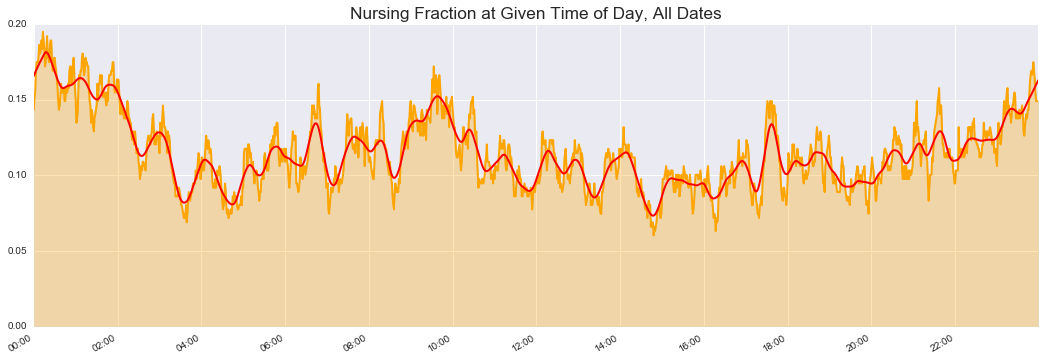

In [93]:
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(111)

ax.plot(timeind,eats.sum(axis=1)/len(tsread.columns.levels[0]),'orange',linewidth=2)
ax.fill_between(timeind, 0, eats.sum(axis=1)/len(tsread.columns.levels[0]),alpha=0.3,facecolor='orange')
filtered = lowess(eats.sum(axis=1)/len(tsread.columns.levels[0]), xtime, is_sorted=True, frac=0.025, it=0)
ax.plot(timeind, filtered[:,1], 'r',linewidth=2)
#ax.set_ylim(0,1.2)
xax = ax.get_xaxis()
xax.set_major_locator(mdates.HourLocator(byhour=range(0,24,2)))
xax.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set_title('Nursing Fraction at Given Time of Day, All Dates',fontsize='xx-large')
fig.autofmt_xdate()

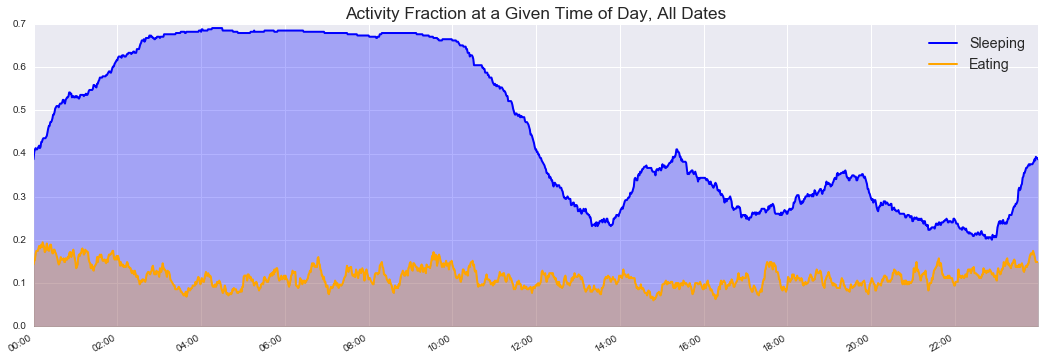

In [166]:
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(111)

ax.plot(timeind,sleeps.sum(axis=1)/len(tsread.columns.levels[0]),'b',linewidth=2,label='Sleeping')
ax.fill_between(timeind, 0, sleeps.sum(axis=1)/len(tsread.columns.levels[0]),alpha=0.3,facecolor='b')
ax.plot(timeind,eats.sum(axis=1)/len(tsread.columns.levels[0]),'orange',linewidth=2,label='Eating')
ax.fill_between(timeind, 0, eats.sum(axis=1)/len(tsread.columns.levels[0]),alpha=0.3,facecolor='orange')
#filtered = lowess(sleeps.sum(axis=1)/len(datearr), xtime, is_sorted=True, frac=0.025, it=0)
#ax.plot(ts.index, filtered[:,1], 'r',linewidth=2)
xax = ax.get_xaxis()
xax.set_major_locator(mdates.HourLocator(byhour=range(0,24,2)))
xax.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set_title('Activity Fraction at a Given Time of Day, All Dates',fontsize='xx-large')
ax.legend(fontsize='x-large')
fig.autofmt_xdate()
fig.savefig('Activity_All.png')

In [164]:
midnight = pd.to_datetime('00:00:00').time()
oneAM = pd.to_datetime('01:00:00').time()
may1 = pd.to_datetime('2016-5-1').date()
may31 = pd.to_datetime('2016-5-31').date()
maysleep = ts.loc[:,(slice(may1,may31),'Sleep')]

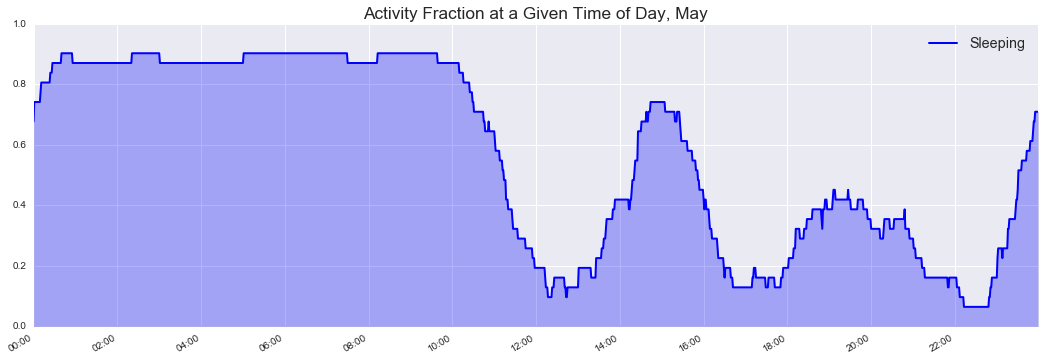

In [167]:
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(111)

ax.plot(timeind,maysleep.sum(axis=1)/31,'b',linewidth=2,label='Sleeping')
ax.fill_between(timeind,0,maysleep.sum(axis=1)/31,alpha=0.3,facecolor='b')
xax = ax.get_xaxis()
xax.set_major_locator(mdates.HourLocator(byhour=range(0,24,2)))
xax.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set_title('Activity Fraction at a Given Time of Day, May',fontsize='xx-large')
ax.legend(fontsize='x-large')
fig.autofmt_xdate()
#fig.savefig('Activity_All.png')

In [163]:
monthnum = 5
motxt = time.strftime('%B',time.strptime(str(monthnum),'%m'))
mocheck = [x.month == monthnum for x in ts.columns.levels[0]]
moflag = []
for ans in mocheck:
    moflag.append(ans)
    moflag.append(ans)

onemo = ts.loc[:,moflag]
print(len(onemo.columns)/2)

sleepy = onemo.xs('Sleep',level=1,axis=1).sum(axis=1)/(len(onemo.columns)/2)
eaty = onemo.xs('Eat',level=1,axis=1).sum(axis=1)/(len(onemo.columns)/2)

onemo.head()

KeyError: IndexError('indices are out-of-bounds',)

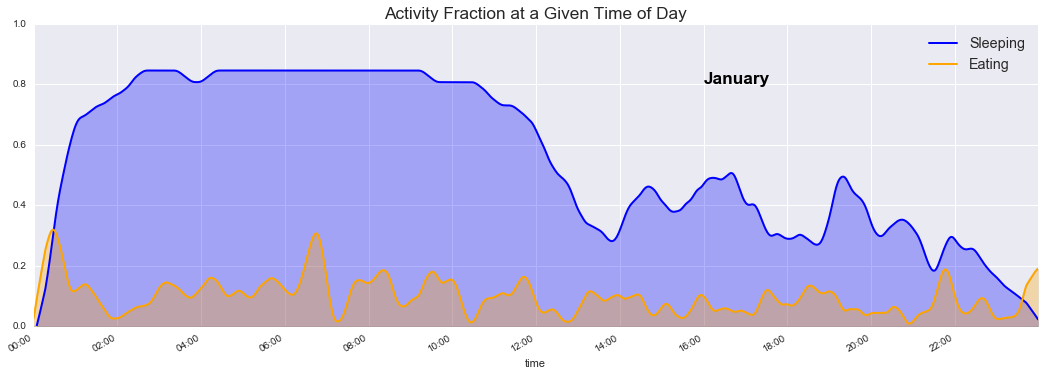

In [52]:
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(111)

####Plot Sleep
filtereds = lowess(sleepy, xtime, is_sorted=True, frac=0.025, it=0)
ax.plot(timeind, filtereds[:,1], 'b',linewidth=2,label='Sleeping')
ax.fill_between(timeind, 0, filtereds[:,1],alpha=0.3,facecolor='b')
#ax.plot(ts.index,sleepy,'b',linewidth=2,label='Sleeping')
#ax.fill_between(ts.index, 0, sleepy,alpha=0.3,facecolor='b')

####Plot Eat
filterede = lowess(eaty, xtime, is_sorted=True, frac=0.025, it=0)
ax.plot(timeind, filterede[:,1], 'orange',linewidth=2,label='Eating')
ax.fill_between(timeind, 0, filterede[:,1],alpha=0.3,facecolor='orange')
#ax.plot(ts.index,eaty,'orange',linewidth=2,label='Eating')
#ax.fill_between(ts.index, 0, eaty,alpha=0.3,facecolor='orange')

####Axis formatting
xax = ax.get_xaxis()
xax.set_major_locator(mdates.HourLocator(byhour=range(0,24,2)))
xax.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set_xlabel('time')
ax.set_title('Activity Fraction at a Given Time of Day',fontsize='xx-large')
ax.text('16:00',max(max(filterede[:,1]),max(filtereds[:,1]))*0.95,motxt,fontsize='xx-large',color='k',fontweight='bold')
ax.legend(fontsize='x-large')
ax.set_ylim(0,1)
fig.autofmt_xdate()
filename = 'Activity_' + str(monthnum) + '.png'
fig.savefig(filename)

In [ ]:
#animation of running sum()? ~30 frames per month?  good use of resampling?